In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Enjoy sports.csv')


In [ ]:
df.shape

(14, 6)

In [ ]:
df.head()

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [ ]:
def values(attr):
  l=[]
  for x in attr:
    if x not in l:
      l.append(x)
  return l

In [ ]:
def Entropy(data):
  d=data.iloc[:,-1]
  d=d.value_counts()
  s=0
  for v in d.keys():
    p=d[v]/sum(d)
    s-=p*np.log2(p)

  return (s)


In [ ]:
def IG(data,A):
  Es=Entropy(data)
  val=values(data[A])
  s_c=data[A].value_counts()
  s_v=[]

  for v in range(len(val)):
    ds=data[data[A]==val[v]]
    s=0
    for res in values(data.iloc[:,-1]):
      try:
        pi=ds.iloc[:,-1].value_counts()[res]/len(ds)
        s-=pi*np.log2(pi)
      except:
        s=0
    s_v.append(s)
  for i in range(len(val)):
    Es=Es-s_c[val[i]]*s_v[i]/sum(s_c)

  return Es



In [ ]:
class Node():
  def __init__(self,name=None,attr=None):
    self.name=name
    self.attr=attr

  def call_(self):
    return self.name

def DTNode(data,features_used):
  node=Node()
  IGmax=0
  vbest=None
  val_list=[v for v in values(data)[:-1] if v not in features_used]
  if val_list !=[]:
    for v in val_list:
      if IG(data,v)>IGmax:
        IGmax=IG(data,v)
        v_best=v

    if v_best:
      features_used.append(v_best)
      node.name=v_best
      node.attr=values(data[v_best])

      return (node)
    else:
      return (None)

  return (None)




def DTclassifier(data,features_used):
  root=DTNode(data,features_used)

  DT_dict={}
  if root!=None:
    item =[]
    for attr in root.attr:
      dataN=data[data[root.name]==attr]
      if Entropy(dataN)==0:
        item.append((attr,values(dataN.iloc[:,-1])[0]))
      else:
        dt=DTclassifier(dataN,features_used)
        item.append((attr,dt))
    DT_dict[root.name]=item
  return (DT_dict)





In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Load the Enjoy Sports dataset (assuming it's in your Google Colab workspace)
data_path = "ENJOYSPORT.csv"  # Replace with the actual path if needed
enjoy_sports_data = pd.read_csv(data_path)

# Check data size and preview
print(f"Data Shape: {enjoy_sports_data.shape}")  # More descriptive message
print("First 10 Rows:")
print(enjoy_sports_data.head(10))

# Create a LabelEncoder for categorical features
categorical_encoder = LabelEncoder()

# Apply encoding to categorical columns (assuming Outlook, Temp., Humidity, Wind)
categorical_columns = ["Outlook", "Temp.", "Humidity", "Wind"]
for col in categorical_columns:
    enjoy_sports_data[col] = categorical_encoder.fit_transform(enjoy_sports_data[col])

# Separate features and target variable
features = enjoy_sports_data[["Outlook", "Temp.", "Humidity", "Wind"]]
target = enjoy_sports_data["Decision"]

# Create a decision tree classifier with entropy criterion and random state for reproducibility
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Train the decision tree model
decision_tree.fit(features, target)

# Print the decision tree structure (may be lengthy depending on the dataset)
print(decision_tree)

# Generate and display the decision tree visualization
dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=features.columns,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.view()  # Display the graph in a new window

Data Shape: (14, 6)
First 10 Rows:
   Day   Outlook Temp. Humidity    Wind Decision
0    1     Sunny   Hot     High    Weak       No
1    2     Sunny   Hot     High  Strong       No
2    3  Overcast   Hot     High    Weak      Yes
3    4      Rain  Mild     High    Weak      Yes
4    5      Rain  Cool   Normal    Weak      Yes
5    6      Rain  Cool   Normal  Strong       No
6    7  Overcast  Cool   Normal  Strong      Yes
7    8     Sunny  Mild     High    Weak       No
8    9     Sunny  Cool   Normal    Weak      Yes
9   10      Rain  Mild   Normal    Weak      Yes
DecisionTreeClassifier(criterion='entropy', random_state=0)


'Source.gv.pdf'

Data Shape: (14, 6)
First 10 Rows:
   Day   Outlook Temp. Humidity    Wind Decision
0    1     Sunny   Hot     High    Weak       No
1    2     Sunny   Hot     High  Strong       No
2    3  Overcast   Hot     High    Weak      Yes
3    4      Rain  Mild     High    Weak      Yes
4    5      Rain  Cool   Normal    Weak      Yes
5    6      Rain  Cool   Normal  Strong       No
6    7  Overcast  Cool   Normal  Strong      Yes
7    8     Sunny  Mild     High    Weak       No
8    9     Sunny  Cool   Normal    Weak      Yes
9   10      Rain  Mild   Normal    Weak      Yes


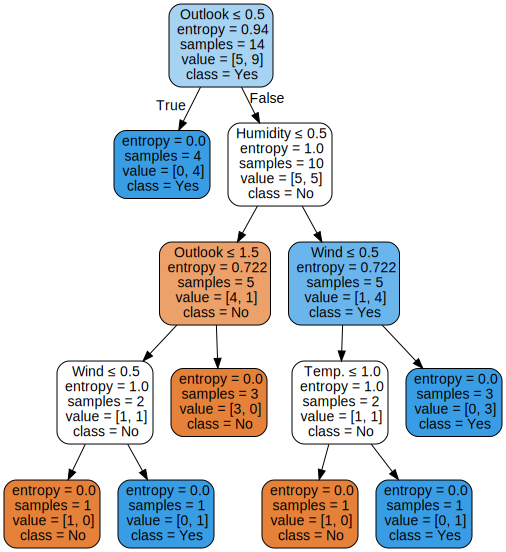